In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl


In [4]:
df = pd.read_excel('HDDData.xlsx', sheet_name='Лист2')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Дата на отказ,Брой операции при настъпване на отказа /в хиля...
2,NaN,2004-03-04 00:00:00,146
3,NaN,2023-08-22 00:00:00,861
4,NaN,2006-01-07 00:00:00,1430


In [5]:
df = df.drop([0,1],axis=0)


In [6]:
del df[df.columns[0]]


In [7]:
df.columns=['Дата_на_отказ','Брой_операции']

In [8]:
import datetime
Launch_date = pd.to_datetime("2000-01-01",yearfirst = True)
df['Дата_на_отказ'] = pd.to_datetime(df['Дата_на_отказ'])
df['Месеци_живот'] = ((((df['Дата_на_отказ'] - Launch_date)/np.timedelta64(1, 'D')).astype(int) / 30.44)+1).astype(int)

In [47]:
df_sorted = df.sort_values('Дата_на_отказ')
df_sorted['Среден_живот'] = 0.0
a = df_sorted.shape[0]
df_sorted.reset_index(inplace = True)
for index in range(df_sorted.shape[0]):
    df_sorted.iloc[index,df_sorted.columns.get_loc('Среден_живот')] = ((df_sorted[:index]['Месеци_живот'].sum() + (a-index-1)*df_sorted.iloc[index,df_sorted.columns.get_loc('Месеци_живот')])/a).round().astype(int)
df_sorted


,index,Дата_на_отказ,Брой_операции,Месеци_живот,Среден_живот
0,328,2000-01-10,439,1,1.0
1,677,2000-01-18,458,1,1.0
2,269,2000-01-24,494,1,1.0
3,461,2000-01-28,1296,1,1.0
4,353,2000-02-14,403,2,2.0
...,...,...,...,...,...
1044,362,2023-11-06,884,287,147.0
1045,364,2023-11-11,306,287,147.0
1046,690,2023-11-26,1414,287,147.0
1047,30,2023-12-10,1049,288,147.0


<Axes: title={'center': 'Среден живот'}, xlabel='Година на отказ', ylabel='Месеци'>

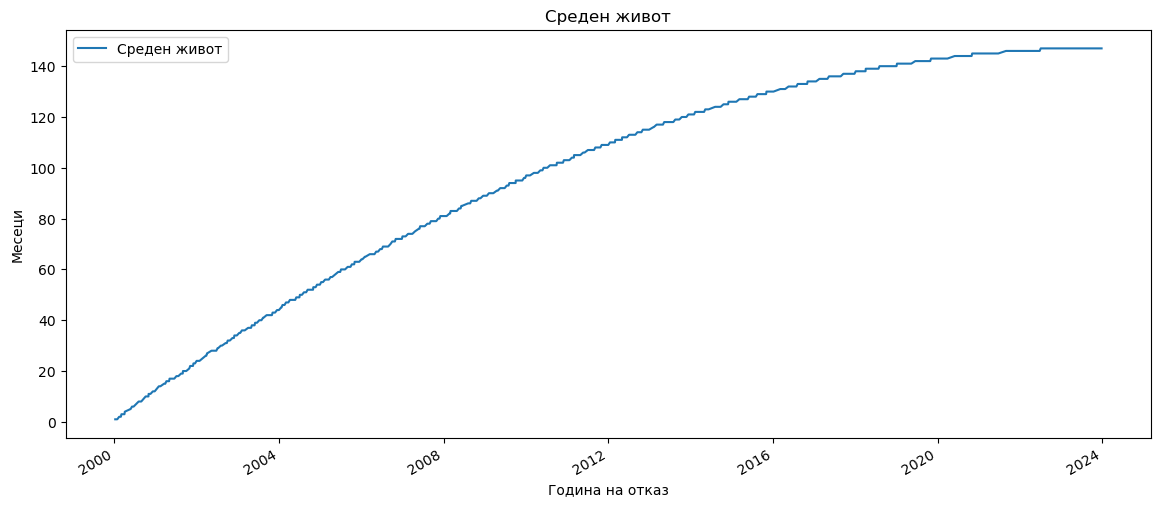

In [59]:
df_sorted.plot.line('Дата_на_отказ', 'Среден_живот', figsize = (14,6), title = 'Среден живот', ylabel = 'Месеци', xlabel = 'Година на отказ', label = 'Среден живот')

In [63]:
df_sorted['Дял_отказали_дискове'] = range(1,(df_sorted['Дата_на_отказ'].shape[0]+1))
df_sorted['Дял_отказали_дискове'] = df_sorted['Дял_отказали_дискове']/1049*100 #в проценти

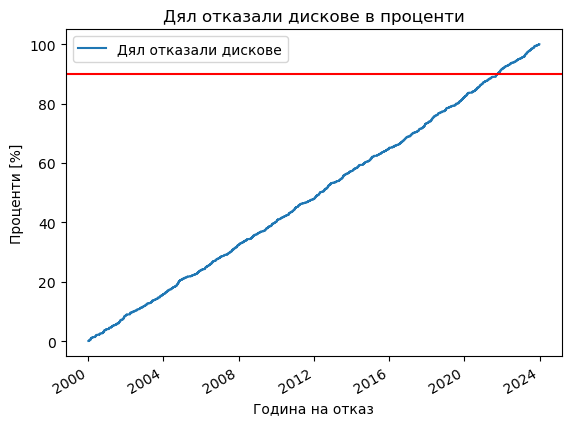

In [67]:
b = df_sorted.plot('Дата_на_отказ','Дял_отказали_дискове', title = 'Дял отказали дискове в проценти', drawstyle = "steps-post", label = 'Дял отказали дискове', xlabel ='Година на отказ', ylabel = 'Проценти [%]')
b.axhline(90, color = 'red')
#Функцията е стъпаловидна, макар и да не си личи

In [69]:
df_sorted['Среден_брой_операции'] = 0.0
for index in range(df_sorted.shape[0]):
    df_sorted.iloc[index,df_sorted.columns.get_loc('Среден_брой_операции')] = round(df_sorted[:(index+1)]['Брой_операции'].sum()/(index+1))
df_sorted

,index,Дата_на_отказ,Брой_операции,Месеци_живот,Среден_живот,Дял_отказали_дискове,Среден_брой_операции
0,328,2000-01-10,439,1,1.0,0.095329,439.0
1,677,2000-01-18,458,1,1.0,0.190658,448.0
2,269,2000-01-24,494,1,1.0,0.285987,464.0
3,461,2000-01-28,1296,1,1.0,0.381316,672.0
4,353,2000-02-14,403,2,2.0,0.476644,618.0
...,...,...,...,...,...,...,...
1044,362,2023-11-06,884,287,147.0,99.618684,789.0
1045,364,2023-11-11,306,287,147.0,99.714013,789.0
1046,690,2023-11-26,1414,287,147.0,99.809342,789.0
1047,30,2023-12-10,1049,288,147.0,99.904671,789.0


<Axes: title={'center': 'Среден брой операции при отказ'}, xlabel='Година на отказ', ylabel='Брой операции в хиляди'>

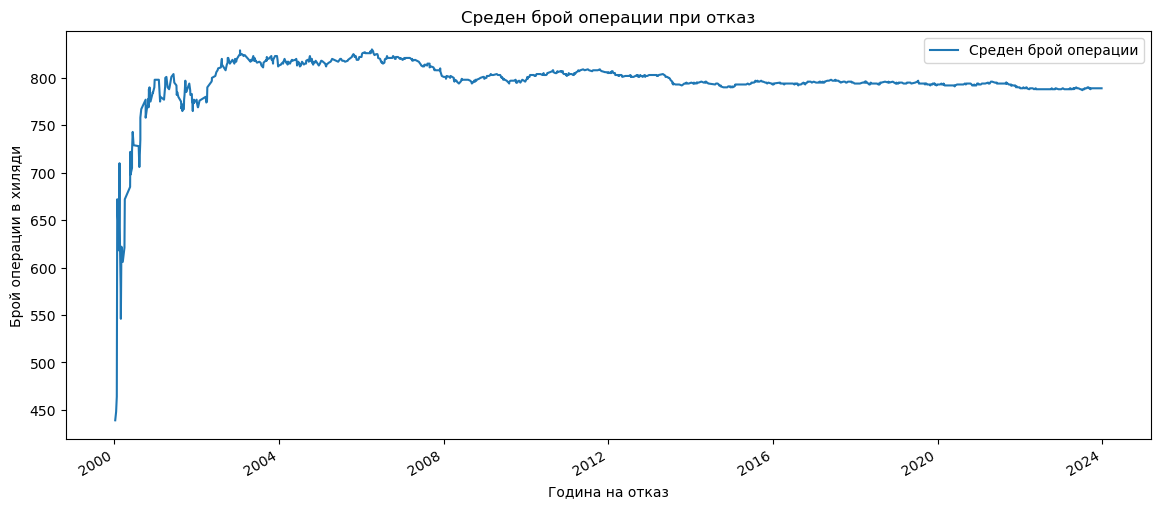

In [73]:
df_sorted.plot.line('Дата_на_отказ', 'Среден_брой_операции', figsize=(14,6), title = 'Среден брой операции при отказ', xlabel = 'Година на отказ', ylabel = 'Брой операции в хиляди', label = 'Среден брой операции')